In [1]:
from turbo.turbo_1 import Turbo1
import numpy as np
import torch
import math
import matplotlib
import matplotlib.pyplot as plt

In [2]:
class Levy:
    def __init__(self, dim=10):
        self.dim = dim
        self.lb = -5 * np.ones(dim)
        self.ub = 10 * np.ones(dim)
        
    def __call__(self, x):
        assert len(x) == self.dim
        assert x.ndim == 1
        assert np.all(x <= self.ub) and np.all(x >= self.lb)
        w = 1 + (x - 1.0) / 4.0
        val = np.sin(np.pi * w[0]) ** 2 + \
            np.sum((w[1:self.dim - 1] - 1) ** 2 * (1 + 10 * np.sin(np.pi * w[1:self.dim - 1] + 1) ** 2)) + \
            (w[self.dim - 1] - 1) ** 2 * (1 + np.sin(2 * np.pi * w[self.dim - 1])**2)
        return val

f = Levy(10)

In [3]:
turbo1 = Turbo1(
    f=f,  # Handle to objective function
    lb=f.lb,  # Numpy array specifying lower bounds
    ub=f.ub,  # Numpy array specifying upper bounds
    n_init=20,  # Number of initial bounds from an Latin hypercube design
    max_evals = 100,  # Maximum number of evaluations
    batch_size=10,  # How large batch size TuRBO uses
    verbose=True,  # Print information from each batch
    use_ard=True,  # Set to true if you want to use ARD for the GP kernel
    max_cholesky_size=2000,  # When we switch from Cholesky to Lanczos
    n_training_steps=50,  # Number of steps of ADAM to learn the hypers
    min_cuda=1024,  # Run on the CPU for small datasets
    device="cpu",  # "cpu" or "cuda"
    dtype="float64",  # float64 or float32
)

Using dtype = torch.float64 
Using device = cpu


In [4]:
turbo1.optimize()


Starting from fbest = 18.55
50) New best: 15.7
60) New best: 14.75
70) New best: 13.65
100) New best: 10.89


In [5]:
X = turbo1.X  # Evaluated points
fX = turbo1.fX  # Observed values
ind_best = np.argmin(fX)
f_best, x_best = fX[ind_best], X[ind_best, :]

print("Best value found:\n\tf(x) = %.3f\nObserved at:\n\tx = %s" % (f_best, np.around(x_best, 3)))

Best value found:
	f(x) = 10.889
Observed at:
	x = [-3.357 -4.098  1.123  3.389  7.671  3.142  1.349  2.014  7.885 -1.321]


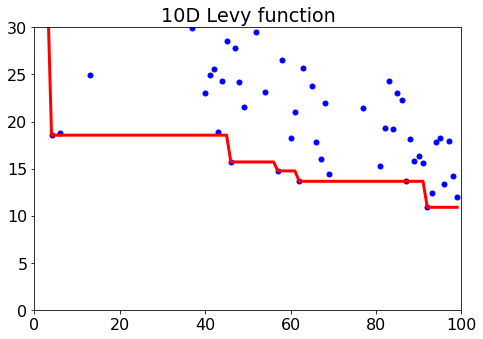

In [6]:
fig = plt.figure(figsize=(7, 5))
matplotlib.rcParams.update({'font.size': 16})
plt.plot(fX, 'b.', ms=10)  # Plot all evaluated points as blue dots
plt.plot(np.minimum.accumulate(fX), 'r', lw=3)  # Plot cumulative minimum as a red line
plt.xlim([0, len(fX)])
plt.ylim([0, 30])
plt.title("10D Levy function")

plt.tight_layout()
plt.show()

In [7]:
fX

array([[ 92.89100166],
       [ 34.95234341],
       [ 35.20455185],
       [ 94.03515019],
       [ 18.54883832],
       [ 79.17736481],
       [ 18.74567428],
       [ 34.49808303],
       [ 52.54268855],
       [128.20874722],
       [ 54.18748868],
       [ 39.58860239],
       [119.55961094],
       [ 24.90798564],
       [142.07015954],
       [ 73.31467634],
       [120.7718661 ],
       [ 66.56283467],
       [ 66.14708172],
       [ 39.79332993],
       [ 72.66175137],
       [106.89108128],
       [ 34.38256252],
       [ 74.35159763],
       [ 56.2196174 ],
       [ 92.52663519],
       [113.60355762],
       [134.2548428 ],
       [ 42.69716162],
       [ 48.12293602],
       [ 46.91181994],
       [ 48.3247873 ],
       [ 70.35596154],
       [ 62.25792486],
       [ 62.1063632 ],
       [ 33.04888136],
       [ 46.17161187],
       [ 29.882534  ],
       [ 42.73397447],
       [ 80.84879041],
       [ 23.01358271],
       [ 24.98682415],
       [ 25.55283695],
       [ 18